In [338]:
import scipy, sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
sys.path.append("/Users/alex/Desktop/Fabry-Perot/modelling")
sys.path.append(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\modelling")
sys.path.append(r"C:\Users\ge85rek\Desktop\Fabry-Perot\modelling")
import read_csv, T_and_R

In [339]:
def calculate_m(min_frequenz_array):
    m_array = []
    for i in range(0,len(min_frequenz_array)-1):
        m_array.append(min_frequenz_array[i]/(min_frequenz_array[i+1]-min_frequenz_array[i]))
    return m_array

In [340]:
def länge(m,n,f):
    lam = scipy.constants.c/f
    return m * lam / (2 * n)

In [341]:
data = read_csv.read_csv(r"C:\Users\ge85rek\Desktop\Fabry-Perot\data\InGaN_FTIR.csv")
# von cm zu m 
frequenz = scipy.constants.c * np.array(data[0][::-1]) * 100
frequenz

array([1.19835259e+13, 1.19979813e+13, 1.20124367e+13, ...,
       2.39786160e+14, 2.39800616e+14, 2.39815071e+14])

In [342]:
wavelength = scipy.constants.c/frequenz
wavelength

array([2.50170494e-05, 2.49869084e-05, 2.49568399e-05, ...,
       1.25024921e-06, 1.25017385e-06, 1.25009849e-06])

In [343]:
# return index of a sorted list wherelist[index] is a specific value
def find_nearest(array, value):
    array = np.asarray(array)
    end = (np.abs(array - value)).argmin()
    return end

In [344]:
def flatten(data, N = 1200, cutdown = None, cutup = None):
    smooth = np.convolve(data, np.ones(N)/N, mode='same')
    return smooth[cutdown:cutup], data[cutdown:cutup]-smooth[cutdown:cutup]


In [345]:
cutdown = find_nearest(frequenz, 0.6e14)
cutup = find_nearest(frequenz, 2.2e14)
frequenz_s = frequenz[cutdown:cutup]

## Calculation for J14028 at room temperature (20deg)

In [346]:
room_smooth, room_smoothed_out = flatten(data[11][::-1][cutdown:cutup], N = 1000)

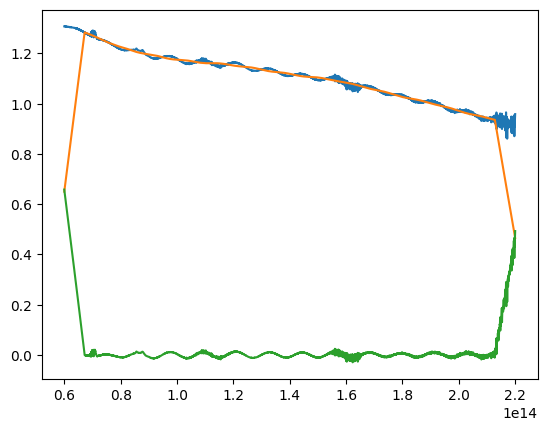

In [347]:
plt.plot(frequenz_s,data[11][::-1][cutdown:cutup])
plt.plot(frequenz_s,room_smooth)
plt.plot(frequenz_s,room_smoothed_out)

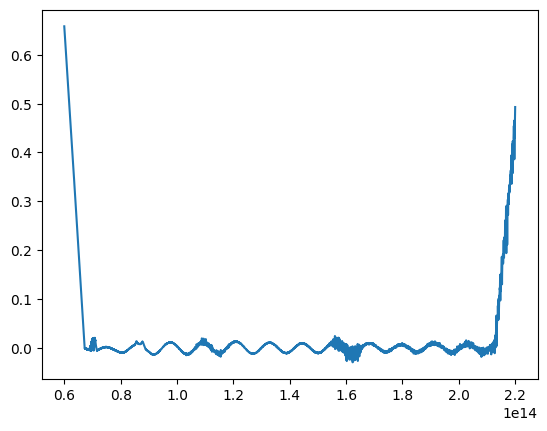

In [348]:
plt.plot(frequenz_s,room_smoothed_out)

In [349]:
minima_index_calc_room = scipy.signal.argrelmin(room_smoothed_out, order = 500)
minima_frequenz_room = []
minima_absorption_room = []
for minimum in minima_index_calc_room[0]:
    minima_frequenz_room.append(frequenz_s[minimum])
    minima_absorption_room.append(room_smoothed_out[minimum])
m_array_room = calculate_m(minima_frequenz_room)
m_array_room = m_array_room
minima_frequenz_room = minima_frequenz_room
minima_absorption_room = minima_absorption_room
m_array_room

[6.4304812766392,
 7.153153149762617,
 7.820987671247991,
 8.475682082499548,
 10.124207839998222,
 10.523980839666178,
 12.337612296752692,
 12.38379022568226,
 14.414634155886741,
 15.434447301614046,
 13.473129618640904,
 21.0336906245703]

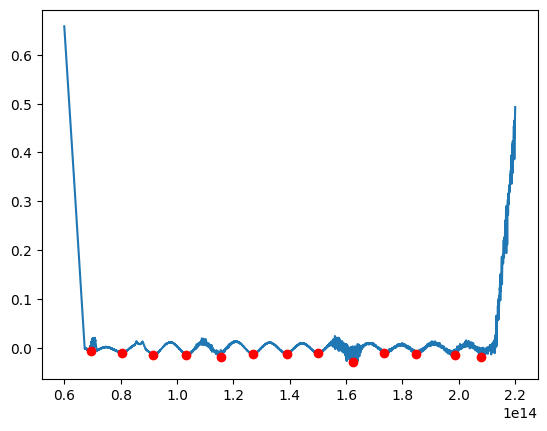

In [350]:
plt.plot(frequenz_s,room_smoothed_out)
plt.plot(minima_frequenz_room,minima_absorption_room,'ro')

In [351]:
m_array_room_clean = np.arange(6,13,1) 
m_array_room_clean

array([ 6,  7,  8,  9, 10, 11, 12])

In [352]:
minima_frequenz_room_clean = minima_frequenz_room[1:8]

In [353]:
def polynomial(x,a0,a1,a2,a3):
    return a0 + a1*x + a2*x**2 + a3*x**3

def refractive_index(m,L,f):
    wavelength = scipy.constants.c/f
    n = (m * wavelength) / (2 * L)
    return n 

In [354]:
n_array_minima_room = []
for i in range(len(m_array_room_clean)):
    print(minima_frequenz_room_clean[i])
    print(m_array_room_clean[i])
    n_array_minima_room.append(refractive_index(m_array_room_clean[i],4.6e-6,minima_frequenz_room_clean[i]))
#n_array_minima_room

80343108193583.73
6
91574953299018.11
7
103283826544742.78
8
115469727990716.27
9
126875037898966.48
10
138930840720343.62
11
150191596641236.9
12


In [355]:
n_array_minima_room

[2.4335232334264703,
 2.4908880535171276,
 2.5240069295855574,
 2.5398451676941094,
 2.56836469007241,
 2.5800427196144318,
 2.603565376587802]

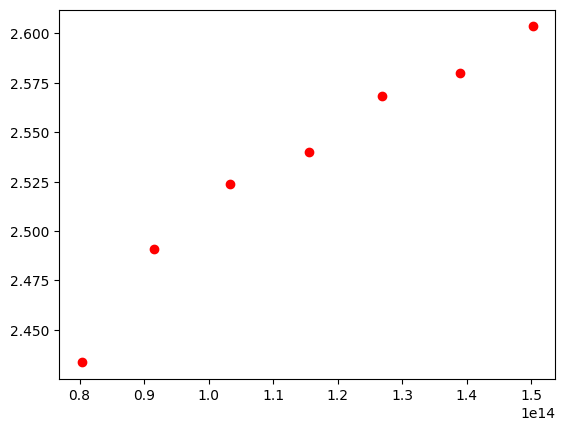

In [356]:
plt.plot(minima_frequenz_room_clean,n_array_minima_room,'ro')

In [357]:
params_J14, cov = scipy.optimize.curve_fit(polynomial, minima_frequenz_room_clean, n_array_minima_room)

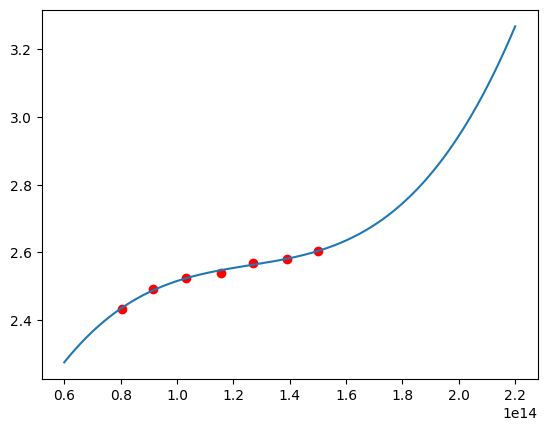

In [358]:
plt.plot(minima_frequenz_room_clean, n_array_minima_room,'ro')
plt.plot(frequenz_s, polynomial(np.array(frequenz_s), *params_J14))

In [359]:
def optdick_total(f):
    return 4.6e-6 * polynomial(np.array(f), *params_J14)

In [360]:
params_STINS = np.array([ 7.62392205e-01,  1.95423832e-14, -9.96420756e-29,  1.83173412e-43])

In [361]:
def optdick_STINS(f): 
    return 3.5e-6 * polynomial(np.array(f), *params_STINS)

In [362]:
def optdick_toppart(f):
    return optdick_total(f) - optdick_STINS(f)

In [363]:
def dispersion_toppart(f):
    return optdick_toppart(f) / 1.1e-6

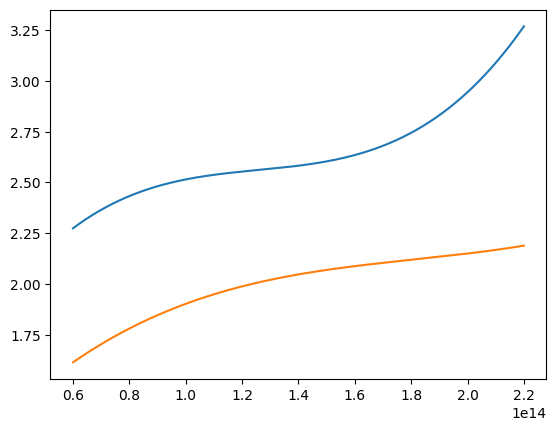

In [364]:
plt.plot(frequenz_s,polynomial(np.array(frequenz_s), *params_J14))
plt.plot(frequenz_s,polynomial(np.array(frequenz_s), *params_STINS))

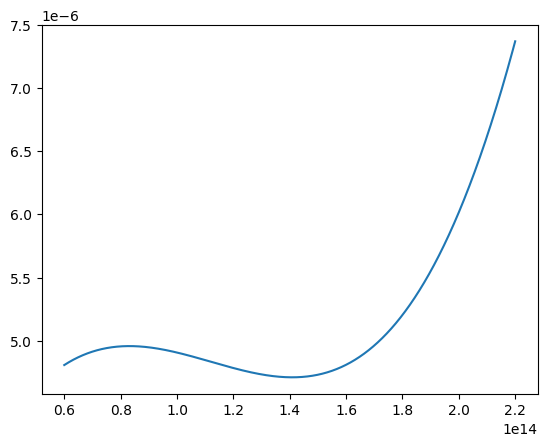

In [365]:
plt.plot(frequenz_s, optdick_toppart(frequenz_s))

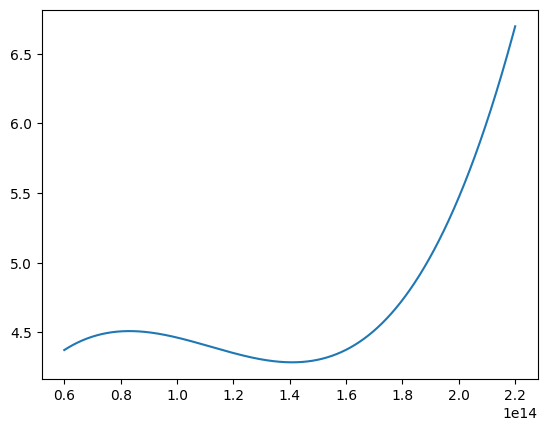

In [366]:
plt.plot(frequenz_s, dispersion_toppart(frequenz_s))

In [367]:
L_array = []
for i in range(len(n_array_minima_room)):
    L_array.append(länge(m_array_room_clean[i],polynomial(minima_frequenz_room[i],*params_J14),minima_frequenz_room[i]))

In [368]:
L_array

[5.476832277502137e-06,
 5.363397447963921e-06,
 5.26405205589451e-06,
 5.1764089795535595e-06,
 5.097071425750059e-06,
 5.0708527997670514e-06,
 5.017229620990683e-06]

### Berechnen der Länge bei 90C

In [369]:
for i in range(len(n_array_minima_room)):
    print(n_array_minima_room[i]-polynomial(minima_frequenz_room[i], *params_J14))

0.0717545838532665
0.05588148424887596
0.0363882283558179
0.016525253792760264
0.021523617467086975
0.01717492499743667
0.023033002399789115


In [370]:
data90 = data[12]

In [371]:
cutdown = find_nearest(frequenz, 0.6e14)
cutup = find_nearest(frequenz, 1.8e14)

In [372]:
smooth90,smoothed_out90 = flatten(data90,cutdown = cutdown, cutup= cutup, N = 1000)

In [373]:
frequenz_s_cut = frequenz[cutdown:cutup]

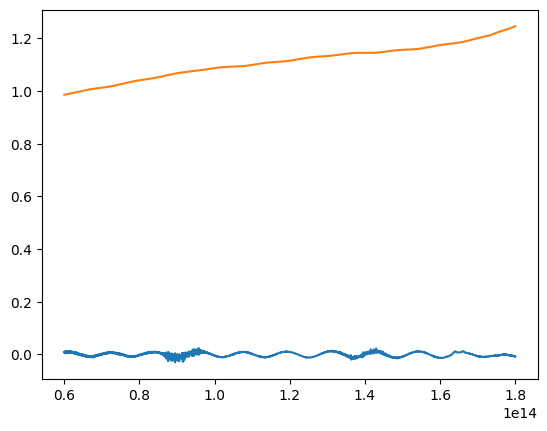

In [374]:
plt.plot(frequenz_s_cut,smoothed_out90)
plt.plot(frequenz_s_cut,smooth90)

In [375]:
minimum_index_90 = scipy.signal.argrelmin(smoothed_out90, order = 500)
minima_frequenz_90 = []
minma_absorption_90 = []
m_array_90 = []
for minimum in minimum_index_90[0]:
    minima_frequenz_90.append(frequenz_s_cut[minimum])
    minma_absorption_90.append(smoothed_out90[minimum])
m_array_90 = calculate_m(minima_frequenz_90)
m_array_90

[6.774240243436493,
 6.5672371544352615,
 6.9785794837993524,
 9.250980398503797,
 9.75373133067487,
 11.014012753843497,
 11.187425853752208,
 12.955863814638393,
 13.868421025001268]

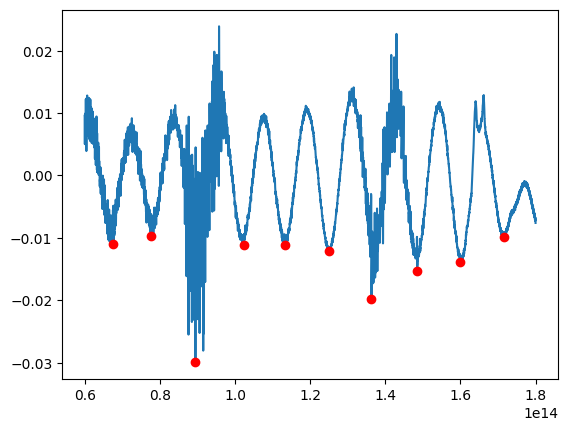

In [376]:
plt.plot(frequenz_s_cut,smoothed_out90)
plt.plot(minima_frequenz_90,minma_absorption_90,'ro')

In [377]:
m_array_90_clean = np.arange(6,16,1)

In [378]:
len(m_array_90_clean)

10

In [379]:
n_array_minima_90 = []
for i in range(len(m_array_90_clean)):
    n_array_minima_90.append(polynomial(minima_frequenz_90[i], *params_J14))
n_array_minima_90

[2.346504227098262,
 2.4190767124303694,
 2.479349343671941,
 2.520913107758499,
 2.5434406786789747,
 2.560335630284623,
 2.5762997698233097,
 2.599876200938659,
 2.6347390565303805,
 2.6887327571024486]

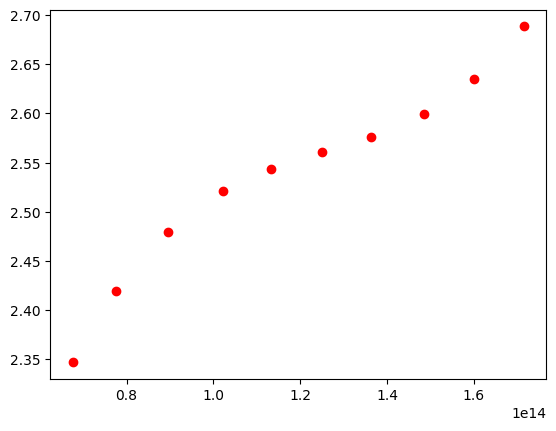

In [380]:
plt.plot(minima_frequenz_90,n_array_minima_90,'ro')

In [381]:
L_array_90 = []
for i in range(len(n_array_minima_90)):
    L_array_90.append(länge(m_array_90_clean[i],n_array_minima_90[i],minima_frequenz_90[i]))

In [382]:
L_array_90

[5.664373586916398e-06,
 5.5856409583370345e-06,
 5.405330270425588e-06,
 5.231136566664058e-06,
 5.198908450164533e-06,
 5.152774947139751e-06,
 5.121388561850704e-06,
 5.046749434931074e-06,
 4.978759373925948e-06,
 4.875694645856087e-06]

### For -160C

In [383]:
data_160 = data[13]

In [384]:
cutdown = find_nearest(frequenz, 0.71e14)
cutup = find_nearest(frequenz, 1.55e14)
frequenz_s_cut = frequenz[cutdown:cutup]

In [385]:
smooth160,smoothed_out160 = flatten(data_160,cutdown = cutdown,cutup = cutup, N = 1400)

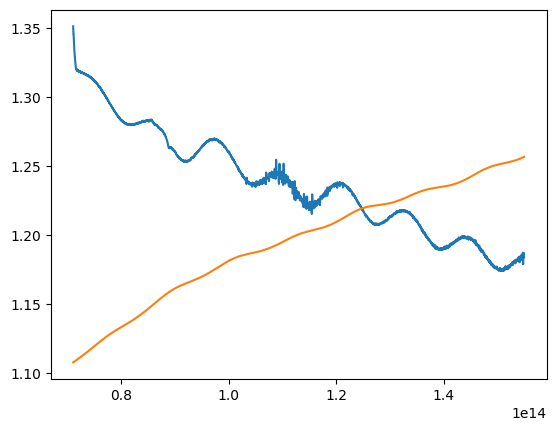

In [386]:
plt.plot(frequenz_s_cut,data_160[::-1][cutdown:cutup])
plt.plot(frequenz_s_cut,smooth160)

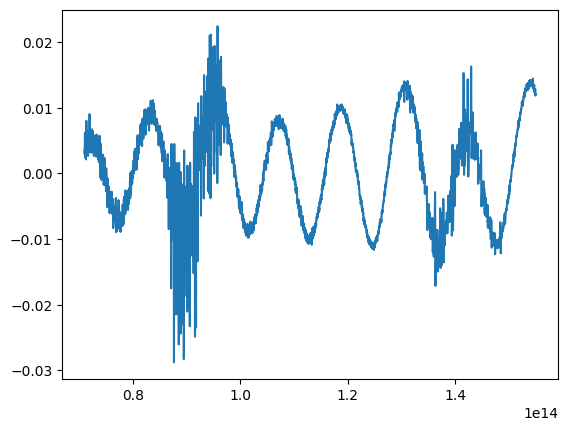

In [387]:
plt.plot(frequenz_s_cut,smoothed_out160)

In [388]:
minimum_index_160 = scipy.signal.argrelmin(smoothed_out160, order = 500)
minima_frequenz_160 = []
minma_absorption_160 = []
m_array_160 = []
for minimum in minimum_index_160[0]:
    minima_frequenz_160.append(frequenz_s_cut[minimum])
    minma_absorption_160.append(smoothed_out160[minimum])
m_array_160 = calculate_m(minima_frequenz_160)
m_array_160

[7.127345849728711,
 6.368697477952707,
 8.513349509941692,
 9.798750018175898,
 10.89407311618008,
 12.26527958862013]

In [389]:
m_array_160_clean = np.arange(6,13,1)
m_array_160_clean   

array([ 6,  7,  8,  9, 10, 11, 12])

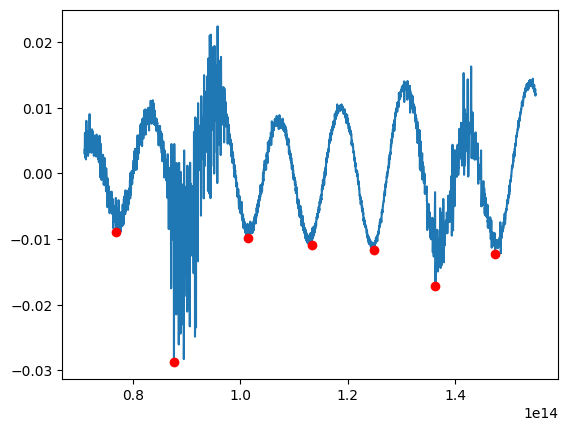

In [390]:
plt.plot(frequenz_s_cut,smoothed_out160)
plt.plot(minima_frequenz_160,minma_absorption_160,'ro')

In [391]:
n_array_minima_160 = []
for i in range(len(m_array_160_clean)):
    n_array_minima_160.append(polynomial(minima_frequenz_160[i], *params_J14))
n_array_minima_160

[2.4140910722081728,
 2.471559355380592,
 2.5186358888414673,
 2.543368502490074,
 2.560200202561676,
 2.5763223990229864,
 2.597387343423652]

In [392]:
L_array_160 = []
for i in range(len(n_array_minima_160)):
    L_array_160.append(länge(m_array_160_clean[i],n_array_minima_160[i],minima_frequenz_160[i]))

In [393]:
L_array_160

[4.847206934056748e-06,
 4.84395441851137e-06,
 4.69523728021491e-06,
 4.680941106028042e-06,
 4.688384474336133e-06,
 4.69406721826721e-06,
 4.696371016546344e-06]

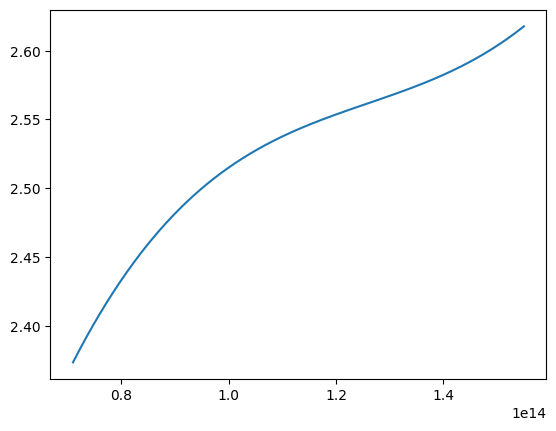

In [394]:
plt.plot(frequenz_s_cut,polynomial(frequenz_s_cut, *params_J14))

In [395]:
print(minima_frequenz_room)
print(m_array_room_clean)

[69530469657480.34, 80343108193583.73, 91574953299018.11, 103283826544742.78, 115469727990716.27, 126875037898966.48, 138930840720343.62, 150191596641236.9, 162319676486271.78, 173580432377185.78, 184826732875360.0, 198544906611300.38, 207984282237533.66]
[ 6  7  8  9 10 11 12]


In [396]:
print(minima_frequenz_90)
print(m_array_90_clean)

[67665723184600.84, 77654403944802.94, 89478920422384.1, 102300859418723.94, 113359239721342.4, 124981380610628.0, 136328868887960.34, 148514770333933.84, 159977901813143.44, 171513310316010.75]
[ 6  7  8  9 10 11 12 13 14 15]


In [397]:
print(minima_frequenz_160)
print(m_array_160_clean)

[76859357014339.81, 87643084734984.28, 101404624679123.4, 113315873543122.88, 124880192801490.62, 136343324310679.44, 147459526214236.56]
[ 6  7  8  9 10 11 12]
